In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import networkx as nx

In [81]:
# create a directed graph
G = nx.DiGraph()
num_levels = 4
num_nodes_per_level = 5
nodes = []
for level in range(num_levels):
    nodes.append(list(np.arange(num_nodes_per_level*level+1,num_nodes_per_level*(level+1)+1)))
print('nodes:', nodes)

edges_list = []
for i in range(100):
    start_level,end_level = sorted(list(
        np.random.choice(range(len(nodes)),2, replace=False, 
                         p=np.concatenate((np.array([1]), 2*np.ones((num_levels-2)),np.array([1])))/(2*num_levels-2))))
    start_node = np.random.choice(nodes[start_level])
    end_node = np.random.choice(nodes[end_level])
    edges_list.append([start_node,end_node])
G.add_edges_from(edges_list)
print('edges:', G.edges)

print('final nodes:', sorted(G.nodes))


nodes: [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
edges: [(11, 16), (11, 20), (5, 9), (5, 20), (5, 17), (5, 12), (5, 14), (5, 10), (5, 15), (5, 6), (9, 12), (9, 20), (9, 15), (9, 14), (7, 11), (7, 14), (7, 15), (7, 12), (7, 19), (7, 18), (7, 13), (14, 18), (14, 16), (14, 17), (14, 20), (12, 18), (12, 19), (12, 20), (3, 14), (3, 11), (3, 7), (3, 12), (3, 13), (6, 16), (6, 12), (6, 13), (6, 17), (6, 15), (6, 11), (2, 11), (2, 12), (2, 15), (2, 8), (4, 12), (4, 17), (4, 9), (4, 11), (4, 13), (4, 10), (4, 7), (4, 14), (10, 11), (10, 12), (10, 19), (10, 13), (10, 18), (15, 17), (15, 16), (15, 20), (13, 18), (8, 16), (8, 12), (8, 11), (8, 14), (8, 18), (8, 19), (1, 15), (1, 13), (1, 8), (1, 6)]
final nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


level: 0
nodes in the current level: {1, 2, 3, 4, 5}
level: 1
nodes in the current level: {6, 7, 8, 9, 10}
level: 2
nodes in the current level: {11, 12, 13, 14, 15}
level: 3
nodes in the current level: {16, 17, 18, 19, 20}


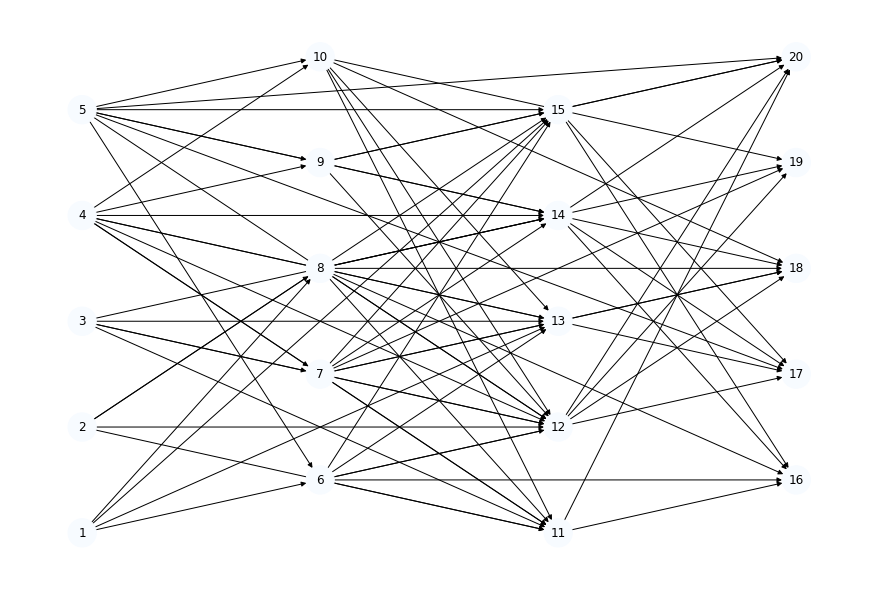

In [82]:
# Draw a multipartite graph
max_levels = 100

nodes_with_out = set([s[0] for s in G.edges])
nodes_with_in = set([s[1] for s in G.edges])
nodes_with_in_and_out = nodes_with_out.intersection(nodes_with_in)
nodes_with_out_only = nodes_with_out-nodes_with_in_and_out
list_of_nodes_in_levels = [set()] * max_levels
posed_nodes = set()
level = 1
while (set(G.nodes)-set(posed_nodes)):
    list_of_nodes_in_levels[level] = set(
        [s[1] for s in G.edges if s[0] in nodes_with_out_only.union(posed_nodes)]
    )-set(
        [s[1] for s in G.edges if s[0] not in nodes_with_out_only.union(posed_nodes)]
    )-posed_nodes

    list_of_nodes_in_levels[level-1] = list_of_nodes_in_levels[level-1].union(
        set([s[0] for s in G.edges if s[1] in list_of_nodes_in_levels[level]])-posed_nodes)

    posed_nodes = posed_nodes.union(list_of_nodes_in_levels[level])
    posed_nodes = posed_nodes.union(list_of_nodes_in_levels[level-1])
    level += 1

pos = dict()
level = 0
s = list_of_nodes_in_levels[0]
while s:
    print('level:', level)
    print('nodes in the current level:', s)                
    pos.update( (n, (level+1, 2*j+np.mod(level,2))) for j,n in enumerate(s) )
    level += 1
    s = list_of_nodes_in_levels[level]
    
plt.figure(figsize=(12,8)) 
nx.draw(G, pos, node_color=np.ones((len(G.nodes))), node_size=800, cmap=plt.cm.Blues, with_labels=True, arrows=True,
        labels={list(G.nodes)[i]:str(list(G.nodes)[i]) for i in range(len(G.nodes))})
plt.show()